# Read ASC files

## Import libraries

In [1]:
import glob, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
#import rasterio as rio
from osgeo import gdal
import numpy as np
from osgeo import osr

## Read gpkg files

In [4]:
list_cvo = [
  '0600200010676', '0600200010727', '0600200011142', '0600200010411',
  '0600200011068', '0600200010708', '0600200011458', '0600200010318',
  '0600200010680', '0600200010712', '0600200010746', '0600200010750',
  '0600200011227', '0600200011265', '060020001127A', '0600200010801',
  '0600200010835', '0600200010924', '0600200011439', '0600200010322',
  '060020001077A', '0600200011528', '0600200011053', '0600200011072',
  '0600200010731', '0601000010362',"0600200011301" ,"0600200011481" ,
  "0600200011640" ,"0600200010074" ,"060020001166A" ,"0600200010074",
  "0600200011655" ,"060020001006A" ,"0600200010981" ,"0600200011462",
  "0600200010765" ,"0600200011513" ,"0600200011123" ,"0600200011617",
  "0600200010816" ,"0600200011621" ,"0600200011636" ,"0600200011710"]

<Axes: >

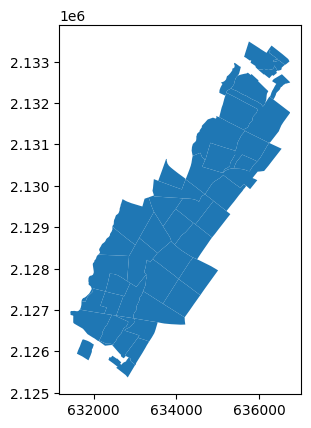

In [5]:
agebs = gpd.read_file("data/colima/agebs_repro.gpkg")
agebs = agebs[agebs["CVEGEO"].isin(list_cvo)]
agebs.plot()

In [14]:
agebs.CVE_AGEB.unique()

array(['1640', '1617', '1621', '0676', '0727', '1142', '0411', '1481',
       '1068', '0708', '1458', '0318', '0680', '0712', '0746', '0750',
       '0765', '0816', '1123', '1227', '1265', '127A', '0801', '0835',
       '0924', '1439', '1462', '0322', '077A', '0981', '1513', '1528',
       '1301', '1053', '1072', '0731', '166A', '1710', '006A', '0074',
       '1655', '1636', '0362'], dtype=object)

In [6]:
gpkg_files = glob.glob('data/zonalStats/*.gpkg')
gpkg_files[:5]

['data/zonalStats\\Depth_0.gpkg',
 'data/zonalStats\\Depth_10200.gpkg',
 'data/zonalStats\\Depth_10500.gpkg',
 'data/zonalStats\\Depth_10800.gpkg',
 'data/zonalStats\\Depth_11100.gpkg']

In [7]:
gpkg_files[0].split('\\')[1].split('.')[0].split('_')

['Depth', '0']

In [10]:
gpkg_gdf = gpd.read_file(gpkg_files[0])
gpkg_gdf.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,_count,_sum,_mean,geometry
0,0600100010081,06,001,0001,0081,NaN,NaN,None,"MULTIPOLYGON (((608933.034 2094643.365, 608933..."
1,060010001019A,06,001,0001,019A,NaN,NaN,None,"MULTIPOLYGON (((609259.111 2094716.349, 609264..."
2,0600100010359,06,001,0001,0359,NaN,NaN,None,"MULTIPOLYGON (((608186.553 2095103.525, 608181..."
3,0600100010151,06,001,0001,0151,NaN,NaN,None,"MULTIPOLYGON (((608847.311 2095141.915, 608867..."
4,0600100010166,06,001,0001,0166,NaN,NaN,None,"MULTIPOLYGON (((610132.371 2094625.183, 610133..."


In [11]:
# check if all the CVEGEO from gpkg_gdf are in the list list_cvo
gpkg_gdf["CVEGEO"].isin(list_cvo).all()

False

In [8]:
magaGDF = pd.DataFrame()

for file in gpkg_files:
  gpkg_gdf = gpd.read_file(file)
  
  metadata = file.split('\\')[1].split('.')[0].split('_')

  gpkg_gdf["class"] = metadata[0]
  gpkg_gdf["time"] = metadata[1]
  
  
  gpkg_gdf = gpkg_gdf[gpkg_gdf["CVE_AGEB"].isin(agebs["CVE_AGEB"])]
  magaGDF = pd.concat([magaGDF, gpkg_gdf], ignore_index=True)
  
magaGDF = gpd.GeoDataFrame(magaGDF, geometry='geometry')
magaGDF.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,_count,_sum,_mean,geometry,class,time
0,0600200011640,06,002,0001,1640,0.0,0.0,NaN,"MULTIPOLYGON (((635481.389 2132657.115, 635481...",Depth,0
1,0600200011617,06,002,0001,1617,0.0,0.0,NaN,"MULTIPOLYGON (((632971.765 2126796.935, 632973...",Depth,0
2,0600200011621,06,002,0001,1621,0.0,0.0,NaN,"MULTIPOLYGON (((633344.752 2126236.664, 633287...",Depth,0
3,0600200010676,06,002,0001,0676,0.0,0.0,NaN,"MULTIPOLYGON (((634027.336 2129950.192, 634132...",Depth,0
4,0600200010727,06,002,0001,0727,0.0,0.0,NaN,"MULTIPOLYGON (((633395.848 2129528.302, 633418...",Depth,0


In [9]:
magaGDF.drop(columns=["geometry"], inplace=True)
magaGDF.to_csv("data/megaGDF.csv", index=False)

In [45]:
magaGDF["class"].value_counts()

Depth       2214
Rain        2187
Velocity    2160
Name: class, dtype: int64

In [12]:
# check if all the CVEGEO from gpkg_gdf are in the list list_cvo
magaGDF["CVEGEO"].isin(list_cvo).all()

True